In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/khali/Desktop/Kaggle_prjt/train.csv")
test = pd.read_csv("C:/Users/khali/Desktop/Kaggle_prjt/test.csv")
train_target_scores = pd.read_csv('C:/Users/khali/Desktop/Kaggle_prjt/train_target_and_scores.csv')

C:\Users\khali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train_df=train.copy()

In [4]:
train_df.shape

(110938, 190)

In [5]:
train_df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [6]:
train_df.columns

Index(['id', 'target', 'home_team_name', 'away_team_name', 'match_date',
       'league_name', 'league_id', 'is_cup', 'home_team_coach_id',
       'away_team_coach_id',
       ...
       'away_team_history_league_id_1', 'away_team_history_league_id_2',
       'away_team_history_league_id_3', 'away_team_history_league_id_4',
       'away_team_history_league_id_5', 'away_team_history_league_id_6',
       'away_team_history_league_id_7', 'away_team_history_league_id_8',
       'away_team_history_league_id_9', 'away_team_history_league_id_10'],
      dtype='object', length=190)

In [7]:
train_df.dtypes.value_counts()

float64    162
object      26
int64        2
dtype: int64

<AxesSubplot:ylabel='None'>

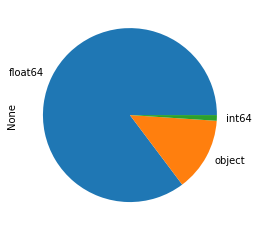

In [8]:
train_df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

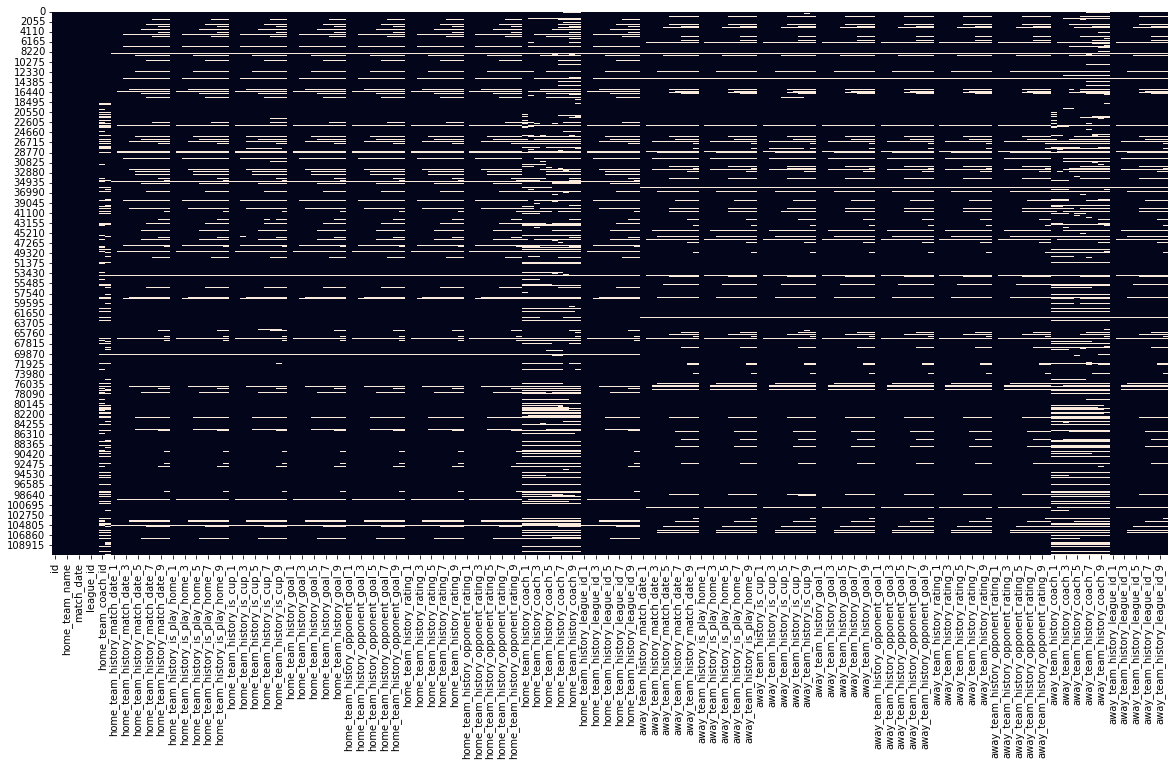

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna(), cbar=False)

In [10]:
(train_df.isna().sum()/train_df.shape[0]).sort_values(ascending=False)

away_team_history_coach_10    0.244542
home_team_history_coach_10    0.240251
away_team_history_coach_9     0.235717
home_team_history_coach_9     0.231958
away_team_history_coach_8     0.227325
                                ...   
league_name                   0.000009
target                        0.000000
match_date                    0.000000
league_id                     0.000000
id                            0.000000
Length: 190, dtype: float64

<h5> peu de valeurs manquantes la variables qui a le plus de valuers manquantes est 25 % </h5>

In [11]:
train_df['target'].value_counts(normalize=True)

home    0.433693
away    0.317060
draw    0.249247
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

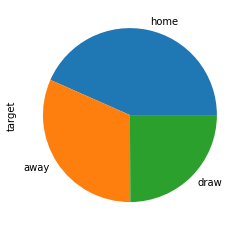

In [12]:
train_df['target'].value_counts(normalize=True).plot.pie()

In [13]:
train_df.isnull().sum()

id                                    0
target                                0
home_team_name                        1
away_team_name                        1
match_date                            0
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 190, dtype: int64

In [14]:
#tous les lignes des 2 colonees
a = train_df.loc[:, ['home_team_name', 'league_id']]  
#nunique(): Compter le nombre d'éléments distincts dans l'axe spécifié.
print("Le nombre d'equipe domicile est :" ,a.home_team_name.nunique())

Le nombre d'equipe domicile est : 9813


In [15]:
ext = train_df.loc[:, ['away_team_name', 'league_id']]  
print("Le nombre d'equipe exterieur est :" ,ext.away_team_name.nunique())

Le nombre d'equipe exterieur est : 9892


In [16]:
teams_No_leagues = a.groupby('home_team_name')['league_id'].count()
teams_No_leagues.sort_values(ascending=False)

home_team_name
Al Ittihad          91
River Plate         71
Rangers             64
Liverpool           63
Al Ahli             62
                    ..
Peñarol W            1
Ugyen Academy        1
Eibar U19            1
Eichede              1
Derby County U19     1
Name: league_id, Length: 9813, dtype: int64

<h4>est-il possible qu'une equipe joue dans 9 league differentes??</h4>

In [17]:
train_df = pd.concat([train, test], axis=0)
b= train_df[['league_id', 'league_name']]
print(b.groupby('league_id')['league_name'].nunique().sort_values(ascending=False))

league_id
199     2
1763    2
334     2
749     2
1695    2
       ..
1128    1
1146    1
1147    1
1148    1
2439    1
Name: league_name, Length: 1000, dtype: int64


<h5> On remarque qu'il y a des id qui sont affecte a 2 differet league name</h5>

In [18]:
b.groupby('league_id')['league_name'].nunique().value_counts()

1    976
2     24
Name: league_name, dtype: int64

<h5> On remarque que 24 league id ont 2 league name different</h5>

In [19]:
print('---------------------------------')
print(b.groupby('league_name')['league_id'].nunique().sort_values(ascending=False))

---------------------------------
league_name
Premier League      35
Super Cup           28
Primera Division     9
Women's Cup          8
Super League         7
                    ..
Esiliiga B           1
Estonian Cup         1
Ettan: North         1
Ettan: South         1
Ýokary Liga          1
Name: league_id, Length: 851, dtype: int64


In [20]:
b.groupby('league_name')['league_id'].nunique().value_counts()

1     800
2      25
3       9
4       6
6       4
7       2
5       1
35      1
9       1
28      1
8       1
Name: league_id, dtype: int64

<h5> On remarque que certains league name ont plus que 35 id c'est pour cette raison qu'on doit negliger league id et utiliser que la colonne league_name </h5>

In [21]:
(train_df.is_cup).value_counts(normalize=True)

False    0.91622
True     0.08378
Name: is_cup, dtype: float64

C:\Users\khali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_cup', ylabel='count'>

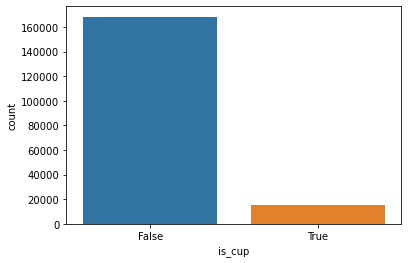

In [22]:
sns.countplot(train_df.is_cup)

<h5> 91% des matches ne sont pas des matches de coupe(league,champions league.....) </h5>

In [23]:
pd.crosstab(train_df['league_name'], train_df['target'])

target,away,draw,home
league_name,,,
1. Deild,30,16,43
1. Deild Women,23,16,29
1. Division,91,78,147
1. Division Women,10,3,13
1. HNL,81,59,112
...,...,...,...
Wsl 2 Women,42,27,48
Ybc Levain Cup,29,13,18
Ykkonen,48,29,55


In [24]:
pd.crosstab(train_df['match_date'], train_df['target'])

target,away,draw,home
match_date,,,
2019-12-01 00:45:00,1,0,0
2019-12-01 01:00:00,2,2,3
2019-12-01 02:00:00,0,0,1
2019-12-01 03:00:00,0,0,1
2019-12-01 03:05:00,1,0,0
...,...,...,...
2021-04-30 21:30:00,0,0,1
2021-04-30 22:00:00,5,3,5
2021-04-30 22:30:00,0,1,0


In [25]:
pd.crosstab(train_df['home_team_history_goal_1'], train_df['target'])

target,away,draw,home
home_team_history_goal_1,,,
0.0,11112,8491,13076
1.0,11853,9275,15701
2.0,6905,5569,9969
3.0,2956,2550,5097
4.0,1177,987,2218
5.0,430,330,883
6.0,175,141,371
7.0,61,47,171
8.0,27,18,67


In [26]:
pd.crosstab(train_df['is_cup'], train_df['target'])

target,away,draw,home
is_cup,,,
False,31931,25707,44218
True,3242,1944,3895


In [27]:
pd.crosstab(train_df['is_cup'], train_df['home_team_name'])

home_team_name,FC Köln,07 Vestur,1. FC Köln,1. FC M'gladbach,1. FC Merseburg,1. FC Union Berlin,1. FSV Mainz 05,1. Maj Ruma,1. SC Feucht,12 Horas,...,Žarkovo,Žarnovica,Ždírec nad Doubravou,Železničar Lajkovac,Železničar Pančevo,Žilina,Žilina II,Žilina U19,Župa,Žďár nad Sázavou
is_cup,,,,,,,,,,,,,,,,,,,,,
False,2,17,4,7,9,5,5,6,7,0,...,30,10,7,6,28,41,30,16,4,10
True,0,1,0,0,0,1,0,0,0,3,...,0,0,0,0,1,4,0,0,0,1


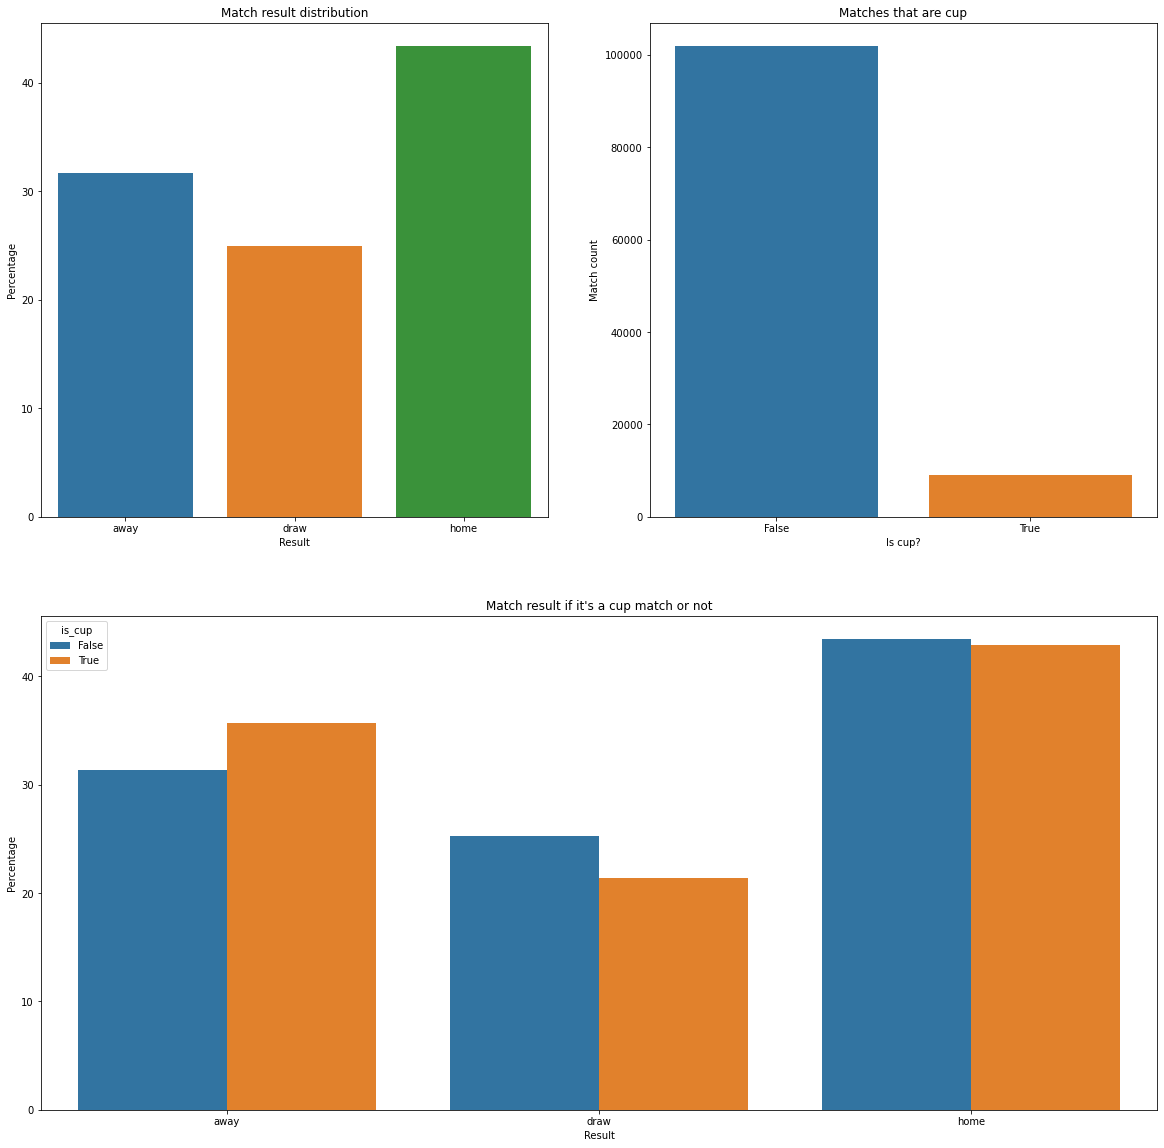

In [28]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(20,20))
g = gridspec.GridSpec(2,2)
ax1= plt.subplot(g[0,0])
ax2= plt.subplot(g[0,1])
ax3= plt.subplot(g[1,:])
axs=[ax1,ax2,ax3]

# Count for each type of Result
cnt_target = train['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('index')
sns.barplot(x='index',y='Percentage',data=cnt_target,ax=axs[0]).set(title="Match result distribution",ylabel='Percentage',xlabel='Result')
# Matches if is cup or not
sns.countplot(x='is_cup',data=train,ax=axs[1]).set(title="Matches that are cup",ylabel='Match count',xlabel='Is cup?')
# Result per home and away team
impact_cup = train.groupby(['is_cup'])['target'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('target')
ax = sns.barplot(x='target',y='percentage',hue='is_cup',data=impact_cup,ax=axs[2]).set(title="Match result if it's a cup match or not",ylabel='Percentage',xlabel='Result')
plt.show()

<h1>Preprocessing</h1>

In [29]:
train.drop(train.filter(regex='coach').columns, axis=1, inplace = True)
test.drop(test.filter(regex='coach').columns, axis=1, inplace = True)

In [30]:
train = train.drop('league_id', axis=1)
test = test.drop('league_id', axis=1)

In [31]:
for col in train.filter(regex='date', axis=1).columns:
    train[col] = pd.to_datetime(train[col])
    test[col] = pd.to_datetime(test[col])
    
# date based features
for i in range(1, 11):
    train[f'home_team_history_match_days_ago_{i}'] = (train['match_date'] - train[f'home_team_history_match_date_{i}']).dt.days
    test[f'home_team_history_match_days_ago_{i}'] = (test['match_date'] - test[f'home_team_history_match_date_{i}']).dt.days
    train[f'away_team_history_match_days_ago_{i}'] = (train['match_date'] - train[f'away_team_history_match_date_{i}']).dt.days
    test[f'away_team_history_match_days_ago_{i}'] = (test['match_date'] - test[f'away_team_history_match_date_{i}']).dt.days

In [32]:
for i in range(1, 11):
    train.drop(f'home_team_history_match_date_{i}', axis=1 , inplace=True)
    train.drop(f'away_team_history_match_date_{i}', axis=1 , inplace=True)
    test.drop(f'home_team_history_match_date_{i}', axis=1 , inplace=True)
    test.drop(f'away_team_history_match_date_{i}', axis=1 , inplace=True)

In [33]:
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,False,0.0,1.0,0.0,...,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,False,1.0,0.0,1.0,...,38.0,41.0,41.0,45.0,44.0,63.0,56.0,71.0,62.0,77.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,False,0.0,1.0,0.0,...,45.0,49.0,56.0,56.0,63.0,63.0,69.0,69.0,73.0,73.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,False,0.0,0.0,1.0,...,35.0,36.0,41.0,42.0,56.0,56.0,64.0,59.0,66.0,65.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,False,0.0,1.0,0.0,...,38.0,38.0,41.0,41.0,55.0,56.0,59.0,59.0,63.0,62.0


In [34]:
test.head()

,id,home_team_name,away_team_name,match_date,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
0,17761448,12 de Octubre,Sportivo Luqueño,2021-05-01 00:15:00,Division 1,False,0.0,0.0,1.0,1.0,...,24.0,47.0,29.0,51.0,41.0,54.0,45.0,63.0,48.0,70.0
1,17695487,Necaxa,Atlas,2021-05-01 00:30:00,Liga MX,False,0.0,1.0,1.0,0.0,...,45.0,48.0,53.0,55.0,56.0,59.0,62.0,62.0,69.0,68.0
2,17715496,Sertãozinho,EC São Bernardo,2021-05-01 01:00:00,Paulista A2,False,1.0,0.0,1.0,0.0,...,51.0,51.0,54.0,55.0,61.0,62.0,243.0,165.0,247.0,168.0
3,17715493,RB Brasil,XV de Piracicaba,2021-05-01 01:00:00,Paulista A2,False,0.0,0.0,1.0,0.0,...,51.0,51.0,55.0,55.0,59.0,61.0,243.0,135.0,248.0,138.0
4,17715492,Taubaté,Monte Azul,2021-05-01 01:00:00,Paulista A2,False,0.0,0.0,1.0,0.0,...,51.0,51.0,55.0,54.0,59.0,62.0,227.0,231.0,234.0,238.0


In [35]:
train = train.drop('match_date', axis=1)
test = test.drop('match_date', axis=1)

In [36]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

30


,Missing Ratio
away_team_history_is_cup_10,13.357912
away_team_history_opponent_rating_10,12.820675
away_team_history_rating_10,12.820675
away_team_history_match_days_ago_10,12.814365
away_team_history_league_id_10,12.814365
away_team_history_is_play_home_10,12.814365
away_team_history_opponent_goal_10,12.814365
away_team_history_goal_10,12.814365
home_team_history_is_cup_10,12.787323
home_team_history_rating_10,12.228452


In [37]:
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

30


,Missing Ratio
away_team_history_is_cup_10,8.828100
away_team_history_rating_10,8.689194
away_team_history_opponent_rating_10,8.689194
away_team_history_match_days_ago_10,8.675441
away_team_history_is_play_home_10,8.675441
away_team_history_opponent_goal_10,8.675441
away_team_history_goal_10,8.675441
away_team_history_league_id_10,8.675441
home_team_history_is_cup_10,8.480147
home_team_history_rating_10,8.361871


<AxesSubplot:title={'center':'% of Values Missing'}>

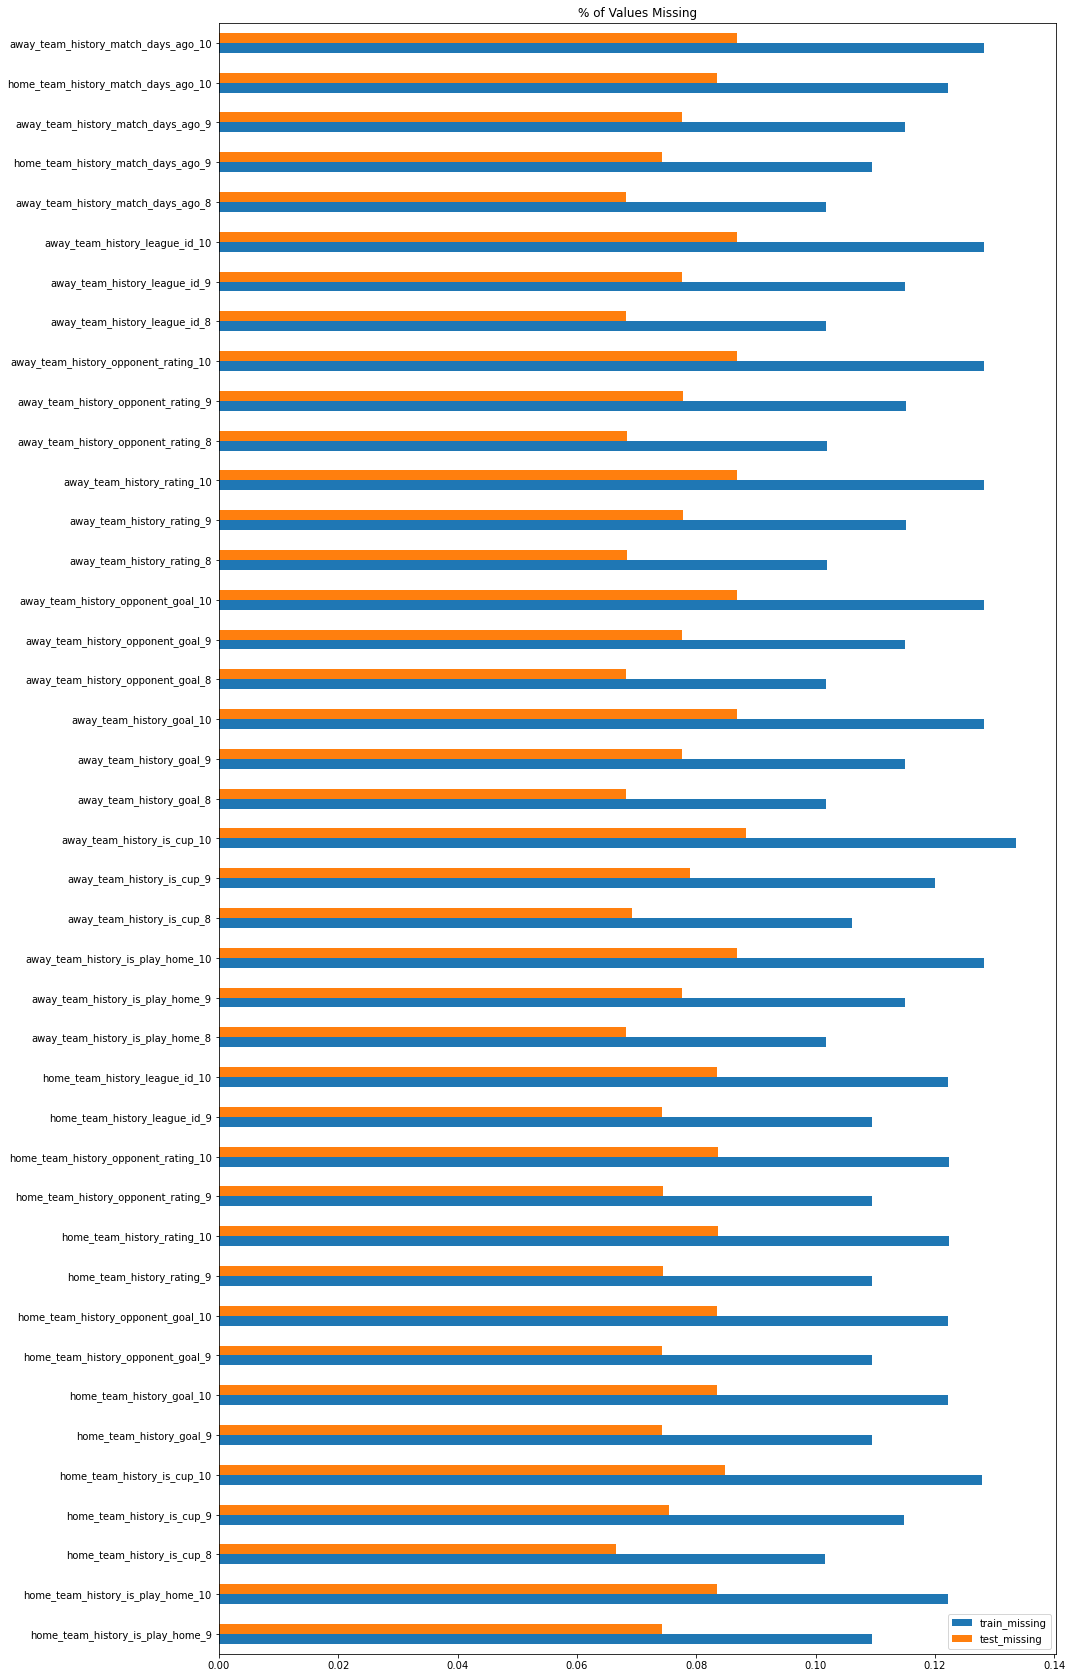

In [38]:
count_missing = pd.DataFrame([train.isna().mean(),test.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing", 1: "test_missing"})
count_missing.query("train_missing > 0.1 and train_missing < 0.2").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

In [39]:
# is_cup
for col in train.filter(regex='is_cup', axis=1).columns:
    train[col] = train[col].fillna(0)
# rating
for col in train.filter(regex='rating', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
# is play home
for col in train.filter(regex='is_play_home', axis=1).columns:
    train[col] = train[col].fillna(0.5)
# league
for col in train.filter(regex='league', axis=1).columns:
    train[col] = train[col].fillna(0)
# goal
for col in train.filter(regex='goal', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
#days
for col in train.filter(regex='days', axis=1).columns:
    train[col] = train[col].fillna(train[col].mean())
    
# ------------------------------------------test------------------------------------------------

# is_cup
for col in test.filter(regex='is_cup', axis=1).columns:
    test[col] = test[col].fillna(0)
# rating
for col in test.filter(regex='rating', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())
# is play home
for col in test.filter(regex='is_play_home', axis=1).columns:
    test[col] = test[col].fillna(0.5)
# league
for col in test.filter(regex='league', axis=1).columns:
    test[col] = test[col].fillna(0)
# goal
for col in test.filter(regex='goal', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())
#days
for col in test.filter(regex='days', axis=1).columns:
    test[col] = test[col].fillna(test[col].mean())

In [40]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

2


,Missing Ratio
home_team_name,0.000901
away_team_name,0.000901


In [41]:
train[train['home_team_name'].isnull()]

,id,target,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
33562,16622092,away,NaN,NaN,0,0,0.0,1.0,0.0,0.0,...,164.0,167.0,168.0,171.0,173.0,175.0,176.0,178.0,180.0,183.0


In [42]:
train = train.drop([33562])

In [43]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

0


,Missing Ratio


In [44]:
train['target'] = train_target_scores['target'].map({'home': 0, 'draw': 1, 'away': 2})
train.head()

,id,target,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
0,11906497,2,Newell's Old Boys,River Plate,Superliga,False,0.0,1.0,0.0,1.0,...,57.0,39.0,63.0,43.0,69.0,50.0,76.0,55.0,90.0,60.0
1,11984383,0,Real Estelí,Deportivo Las Sabanas,Primera Division,False,1.0,0.0,1.0,0.0,...,38.0,41.0,41.0,45.0,44.0,63.0,56.0,71.0,62.0,77.0
2,11983301,1,UPNFM,Marathón,Liga Nacional,False,0.0,1.0,0.0,1.0,...,45.0,49.0,56.0,56.0,63.0,63.0,69.0,69.0,73.0,73.0
3,11983471,2,León,Morelia,Liga MX,False,0.0,0.0,1.0,1.0,...,35.0,36.0,41.0,42.0,56.0,56.0,64.0,59.0,66.0,65.0
4,11883005,0,Cobán Imperial,Iztapa,Liga Nacional,False,0.0,1.0,0.0,1.0,...,38.0,38.0,41.0,41.0,55.0,56.0,59.0,59.0,63.0,62.0


In [45]:
test.head()

,id,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,...,home_team_history_match_days_ago_6,away_team_history_match_days_ago_6,home_team_history_match_days_ago_7,away_team_history_match_days_ago_7,home_team_history_match_days_ago_8,away_team_history_match_days_ago_8,home_team_history_match_days_ago_9,away_team_history_match_days_ago_9,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10
0,17761448,12 de Octubre,Sportivo Luqueño,Division 1,False,0.0,0.0,1.0,1.0,0.0,...,24.0,47.0,29.0,51.0,41.0,54.0,45.0,63.0,48.0,70.0
1,17695487,Necaxa,Atlas,Liga MX,False,0.0,1.0,1.0,0.0,1.0,...,45.0,48.0,53.0,55.0,56.0,59.0,62.0,62.0,69.0,68.0
2,17715496,Sertãozinho,EC São Bernardo,Paulista A2,False,1.0,0.0,1.0,0.0,0.0,...,51.0,51.0,54.0,55.0,61.0,62.0,243.0,165.0,247.0,168.0
3,17715493,RB Brasil,XV de Piracicaba,Paulista A2,False,0.0,0.0,1.0,0.0,1.0,...,51.0,51.0,55.0,55.0,59.0,61.0,243.0,135.0,248.0,138.0
4,17715492,Taubaté,Monte Azul,Paulista A2,False,0.0,0.0,1.0,0.0,1.0,...,51.0,51.0,55.0,54.0,59.0,62.0,227.0,231.0,234.0,238.0


In [46]:
test.columns

Index(['id', 'home_team_name', 'away_team_name', 'league_name', 'is_cup',
       'home_team_history_is_play_home_1', 'home_team_history_is_play_home_2',
       'home_team_history_is_play_home_3', 'home_team_history_is_play_home_4',
       'home_team_history_is_play_home_5',
       ...
       'home_team_history_match_days_ago_6',
       'away_team_history_match_days_ago_6',
       'home_team_history_match_days_ago_7',
       'away_team_history_match_days_ago_7',
       'home_team_history_match_days_ago_8',
       'away_team_history_match_days_ago_8',
       'home_team_history_match_days_ago_9',
       'away_team_history_match_days_ago_9',
       'home_team_history_match_days_ago_10',
       'away_team_history_match_days_ago_10'],
      dtype='object', length=165)

In [47]:
train['is_cup'] = train['is_cup'].map({False: 0, True: 1})
test['is_cup'] = test['is_cup'].map({False: 0, True: 1})

In [48]:
# Add Column of sum of home_team_history_goal & away_team_history_goal
train['home_team_history_goal']=train[['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']].sum(axis=1)
train['away_team_history_goal']=train[['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']].sum(axis=1)
# Add Column of sum of home_team_opponent_history_goal & away_team_opponent_history_goal
train['home_team_history_opponent_goal']=train[['home_team_history_opponent_goal_1','home_team_history_opponent_goal_2','home_team_history_opponent_goal_3','home_team_history_opponent_goal_4','home_team_history_opponent_goal_5','home_team_history_opponent_goal_6','home_team_history_opponent_goal_7','home_team_history_opponent_goal_8','home_team_history_opponent_goal_9','home_team_history_opponent_goal_10']].sum(axis=1)
train['away_team_history_opponent_goal']=train[['away_team_history_opponent_goal_1','away_team_history_opponent_goal_2','away_team_history_opponent_goal_3','away_team_history_opponent_goal_4','away_team_history_opponent_goal_5','away_team_history_opponent_goal_6','away_team_history_opponent_goal_7','away_team_history_opponent_goal_8','away_team_history_opponent_goal_9','away_team_history_opponent_goal_10']].sum(axis=1)
# Add Column of sum of home_team_history_rating & away_team_history_rating
train['home_team_history_rating']=train[['home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10']].mean(axis=1)
train['away_team_history_rating']=train[['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']].mean(axis=1)
# Add Column of sum of home_team_history_opponent_rating & away_team_history_opponent_rating
train['home_team_history_opponent_rating']=train[['home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10']].mean(axis=1)
train['away_team_history_opponent_rating']=train[['away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10']].mean(axis=1)


# Delete Columns 
for i in range(1,11):
    del train[f"home_team_history_goal_{i}"]
    del train[f"away_team_history_goal_{i}"]
    del train[f"home_team_history_opponent_goal_{i}"]
    del train[f"away_team_history_opponent_goal_{i}"]
    del train[f"home_team_history_rating_{i}"]
    del train[f"away_team_history_rating_{i}"]
    del train[f"home_team_history_opponent_rating_{i}"]
    del train[f"away_team_history_opponent_rating_{i}"]
    
train  

,id,target,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,...,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating
0,11906497,2,Newell's Old Boys,River Plate,Superliga,0,0.0,1.0,0.0,1.0,...,90.0,60.0,13.0,16.0,10.0,9.0,5.496371,8.561214,4.400204,3.808902
1,11984383,0,Real Estelí,Deportivo Las Sabanas,Primera Division,0,1.0,0.0,1.0,0.0,...,62.0,77.0,9.0,8.0,10.0,14.0,8.440839,5.287316,4.546772,6.822376
2,11983301,1,UPNFM,Marathón,Liga Nacional,0,0.0,1.0,0.0,1.0,...,73.0,73.0,19.0,21.0,17.0,11.0,6.844712,7.620071,5.547477,5.188232
3,11983471,2,León,Morelia,Liga MX,0,0.0,0.0,1.0,1.0,...,66.0,65.0,18.0,24.0,13.0,20.0,7.449923,5.818128,4.983015,6.469250
4,11883005,0,Cobán Imperial,Iztapa,Liga Nacional,0,0.0,1.0,0.0,1.0,...,63.0,62.0,18.0,18.0,14.0,10.0,7.079634,5.983338,5.192975,6.027979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,1,Zamora Fútbol Club,Hermanos Colmenares,Primera Division,0,0.0,1.0,0.0,1.0,...,166.0,157.0,17.0,17.0,9.0,14.0,6.475353,5.361246,4.686841,6.517974
110934,18030096,2,Royal Pari,Oriente Petrolero,Liga De Futbol Prof,0,0.0,1.0,0.0,1.0,...,124.0,129.0,26.0,13.0,14.0,17.0,8.142437,6.175490,6.962505,8.843194
110935,17715497,1,São Bernardo,Água Santa,Paulista A2,0,0.0,0.0,1.0,0.0,...,139.0,145.0,10.0,12.0,11.0,2.0,5.836659,6.499731,4.690324,4.335393
110936,17944153,2,Everton,La Serena,Primera Division,0,0.0,1.0,0.0,0.0,...,106.0,102.0,10.0,7.0,14.0,7.0,5.764963,5.069059,5.605793,5.918087


In [49]:
# Add Column of sum of home_team_history_goal & away_team_history_goal
test['home_team_history_goal']=test[['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']].sum(axis=1)
test['away_team_history_goal']=test[['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']].sum(axis=1)
# Add Column of sum of home_team_opponent_history_goal & away_team_opponent_history_goal
test['home_team_history_opponent_goal']=test[['home_team_history_opponent_goal_1','home_team_history_opponent_goal_2','home_team_history_opponent_goal_3','home_team_history_opponent_goal_4','home_team_history_opponent_goal_5','home_team_history_opponent_goal_6','home_team_history_opponent_goal_7','home_team_history_opponent_goal_8','home_team_history_opponent_goal_9','home_team_history_opponent_goal_10']].sum(axis=1)
test['away_team_history_opponent_goal']=test[['away_team_history_opponent_goal_1','away_team_history_opponent_goal_2','away_team_history_opponent_goal_3','away_team_history_opponent_goal_4','away_team_history_opponent_goal_5','away_team_history_opponent_goal_6','away_team_history_opponent_goal_7','away_team_history_opponent_goal_8','away_team_history_opponent_goal_9','away_team_history_opponent_goal_10']].sum(axis=1)
# Add Column of sum of home_team_history_rating & away_team_history_rating
test['home_team_history_rating']=test[['home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10']].mean(axis=1)
test['away_team_history_rating']=test[['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']].mean(axis=1)
# Add Column of sum of home_team_history_opponent_rating & away_team_history_opponent_rating
test['home_team_history_opponent_rating']=test[['home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10']].mean(axis=1)
test['away_team_history_opponent_rating']=test[['away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10']].mean(axis=1)


# Delete Columns 
for i in range(1,11):
    del test[f"home_team_history_goal_{i}"]
    del test[f"away_team_history_goal_{i}"]
    del test[f"home_team_history_opponent_goal_{i}"]
    del test[f"away_team_history_opponent_goal_{i}"]
    del test[f"home_team_history_rating_{i}"]
    del test[f"away_team_history_rating_{i}"]
    del test[f"home_team_history_opponent_rating_{i}"]
    del test[f"away_team_history_opponent_rating_{i}"]
    
test  

,id,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,...,home_team_history_match_days_ago_10,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating
0,17761448,12 de Octubre,Sportivo Luqueño,Division 1,0,0.0,0.0,1.0,1.0,0.0,...,48.0,70.0,10.0,11.0,6.0,14.0,4.570763,4.811870,7.408696,6.221093
1,17695487,Necaxa,Atlas,Liga MX,0,0.0,1.0,1.0,0.0,1.0,...,69.0,68.0,7.0,10.0,14.0,10.0,5.203757,5.885441,6.435353,5.629701
2,17715496,Sertãozinho,EC São Bernardo,Paulista A2,0,1.0,0.0,1.0,0.0,0.0,...,247.0,168.0,8.0,6.0,14.0,15.0,4.474860,4.835428,6.684485,6.317987
3,17715493,RB Brasil,XV de Piracicaba,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,248.0,138.0,8.0,11.0,16.0,8.0,4.561036,6.809434,6.706340,4.405098
4,17715492,Taubaté,Monte Azul,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,234.0,238.0,9.0,6.0,12.0,9.0,5.102046,4.377685,5.986625,6.635796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,Cerro,Defensor Sporting,Segunda Division,0,1.0,0.0,1.0,0.0,1.0,...,68.0,68.0,13.0,15.0,8.0,9.0,5.893499,6.661582,4.907744,4.596630
72707,18164889,Boca Juniors,Newell's Old Boys,Superliga,0,0.0,1.0,0.0,1.0,1.0,...,58.0,63.0,16.0,8.0,9.0,11.0,6.336037,5.484650,4.602886,5.567140
72708,18449018,Mexico W,Canada W,Friendly International Women,0,1.0,1.0,0.0,0.0,0.0,...,629.0,172.0,12.0,12.0,18.0,5.0,5.920656,8.028838,10.551035,5.826094
72709,17958831,Flamengo,Ceará,Serie A,0,0.0,0.0,0.0,1.0,0.0,...,31.0,41.0,20.0,14.0,8.0,8.0,7.665525,5.080228,4.475615,5.094133


In [50]:
test['target'] = train_target_scores['target'].map({'home': 0, 'draw': 1, 'away': 2})
test.head()

,id,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,...,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating,target
0,17761448,12 de Octubre,Sportivo Luqueño,Division 1,0,0.0,0.0,1.0,1.0,0.0,...,70.0,10.0,11.0,6.0,14.0,4.570763,4.811870,7.408696,6.221093,2
1,17695487,Necaxa,Atlas,Liga MX,0,0.0,1.0,1.0,0.0,1.0,...,68.0,7.0,10.0,14.0,10.0,5.203757,5.885441,6.435353,5.629701,0
2,17715496,Sertãozinho,EC São Bernardo,Paulista A2,0,1.0,0.0,1.0,0.0,0.0,...,168.0,8.0,6.0,14.0,15.0,4.474860,4.835428,6.684485,6.317987,1
3,17715493,RB Brasil,XV de Piracicaba,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,138.0,8.0,11.0,16.0,8.0,4.561036,6.809434,6.706340,4.405098,2
4,17715492,Taubaté,Monte Azul,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,238.0,9.0,6.0,12.0,9.0,5.102046,4.377685,5.986625,6.635796,0


In [51]:
# Delete Columns history_league_id_{i} 
for i in range(1,11):
    del train[f"home_team_history_league_id_{i}"]
    del train[f"away_team_history_league_id_{i}"]
    del test[f"home_team_history_league_id_{i}"]
    del test[f"away_team_history_league_id_{i}"]
    
test

,id,home_team_name,away_team_name,league_name,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,...,away_team_history_match_days_ago_10,home_team_history_goal,away_team_history_goal,home_team_history_opponent_goal,away_team_history_opponent_goal,home_team_history_rating,away_team_history_rating,home_team_history_opponent_rating,away_team_history_opponent_rating,target
0,17761448,12 de Octubre,Sportivo Luqueño,Division 1,0,0.0,0.0,1.0,1.0,0.0,...,70.0,10.0,11.0,6.0,14.0,4.570763,4.811870,7.408696,6.221093,2
1,17695487,Necaxa,Atlas,Liga MX,0,0.0,1.0,1.0,0.0,1.0,...,68.0,7.0,10.0,14.0,10.0,5.203757,5.885441,6.435353,5.629701,0
2,17715496,Sertãozinho,EC São Bernardo,Paulista A2,0,1.0,0.0,1.0,0.0,0.0,...,168.0,8.0,6.0,14.0,15.0,4.474860,4.835428,6.684485,6.317987,1
3,17715493,RB Brasil,XV de Piracicaba,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,138.0,8.0,11.0,16.0,8.0,4.561036,6.809434,6.706340,4.405098,2
4,17715492,Taubaté,Monte Azul,Paulista A2,0,0.0,0.0,1.0,0.0,1.0,...,238.0,9.0,6.0,12.0,9.0,5.102046,4.377685,5.986625,6.635796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,Cerro,Defensor Sporting,Segunda Division,0,1.0,0.0,1.0,0.0,1.0,...,68.0,13.0,15.0,8.0,9.0,5.893499,6.661582,4.907744,4.596630,0
72707,18164889,Boca Juniors,Newell's Old Boys,Superliga,0,0.0,1.0,0.0,1.0,1.0,...,63.0,16.0,8.0,9.0,11.0,6.336037,5.484650,4.602886,5.567140,0
72708,18449018,Mexico W,Canada W,Friendly International Women,0,1.0,1.0,0.0,0.0,0.0,...,172.0,12.0,12.0,18.0,5.0,5.920656,8.028838,10.551035,5.826094,0
72709,17958831,Flamengo,Ceará,Serie A,0,0.0,0.0,0.0,1.0,0.0,...,41.0,20.0,14.0,8.0,8.0,7.665525,5.080228,4.475615,5.094133,0


In [52]:
del test['home_team_name']
del test['away_team_name']
del test['league_name']

['home_team_history_is_cup_1', 'home_team_history_is_cup_2', 'home_team_history_is_cup_3', 'home_team_history_is_cup_4', 'home_team_history_is_cup_5', 'home_team_history_is_cup_6', 'home_team_history_is_cup_7', 'home_team_history_is_cup_8', 'home_team_history_is_cup_9', 'home_team_history_is_cup_10']


<AxesSubplot:>

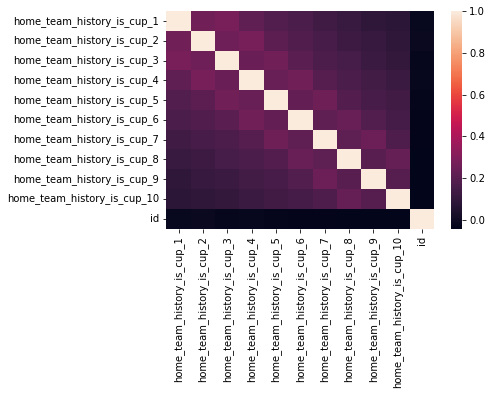

In [53]:
target_columns = 'home_team_history_is_cup'
###
cols = []
for col in train.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train[cols],train_target_scores], axis=1).corr()
sns.heatmap(corr)

['away_team_history_match_days_ago_1', 'away_team_history_match_days_ago_2', 'away_team_history_match_days_ago_3', 'away_team_history_match_days_ago_4', 'away_team_history_match_days_ago_5', 'away_team_history_match_days_ago_6', 'away_team_history_match_days_ago_7', 'away_team_history_match_days_ago_8', 'away_team_history_match_days_ago_9', 'away_team_history_match_days_ago_10']


<AxesSubplot:>

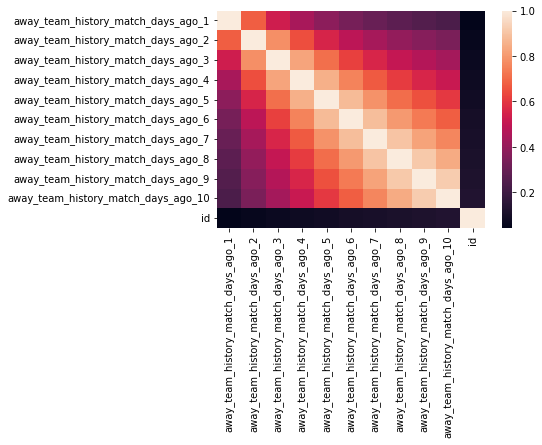

In [54]:
target_columns = 'away_team_history_match_days_ago'
###
cols = []
for col in train.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train[cols],train_target_scores], axis=1).corr()
sns.heatmap(corr)

['home_team_history_rating']


<AxesSubplot:>

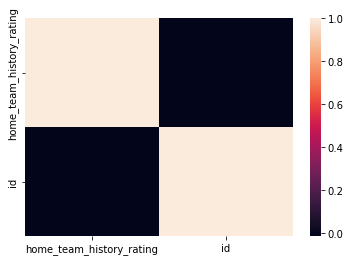

In [55]:
target_columns = 'home_team_history_rating'
###
cols = []
for col in train.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train[cols],train_target_scores], axis=1).corr()
sns.heatmap(corr)

<h2>Modeling</h2>

In [56]:
def preprocessing(train):
    
    rating_features = [x for x in  train if 'rating' in x]

    #Make X and y
    X = train[rating_features]
    y = train['target']
    
    print(y.value_counts())
    
    return X, y

In [57]:
X_train, y_train = preprocessing(train)

0    48113
2    35173
1    27651
Name: target, dtype: int64


In [58]:
X__test, y__test = preprocessing(test)

0    31932
2    23202
1    17577
Name: target, dtype: int64


In [59]:
# Creating and training our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

model = LogisticRegression(C=0.001,penalty='l2',solver='lbfgs')


In [60]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X__test)
    
    print(confusion_matrix(y__test, ypred))
    print(classification_report(y__test, ypred))

In [61]:
   evaluation(model)

[[22482    29  9421]
 [12517    15  5045]
 [16351    19  6832]]
              precision    recall  f1-score   support

           0       0.44      0.70      0.54     31932
           1       0.24      0.00      0.00     17577
           2       0.32      0.29      0.31     23202

    accuracy                           0.40     72711
   macro avg       0.33      0.33      0.28     72711
weighted avg       0.35      0.40      0.34     72711



In [62]:
prediction = model.predict_proba(X__test)
prediction

array([[0.36062054, 0.29191273, 0.34746673],
       [0.36067623, 0.29138757, 0.34793619],
       [0.38929289, 0.29875665, 0.31195046],
       ...,
       [0.17119731, 0.19384419, 0.63495849],
       [0.5564164 , 0.25661563, 0.18696798],
       [0.35804471, 0.29991891, 0.34203639]])

In [63]:
df_sub = pd.DataFrame({
    'id': test['id'],
    'away': prediction[:, 0],
    'draw': prediction[:, 1],
    'home': prediction[:, 2]
})
df_sub

,id,away,draw,home
0,17761448,0.360621,0.291913,0.347467
1,17695487,0.360676,0.291388,0.347936
2,17715496,0.389293,0.298757,0.311950
3,17715493,0.241205,0.293148,0.465647
4,17715492,0.478397,0.285097,0.236507
...,...,...,...,...
72706,18450246,0.375724,0.301352,0.322923
72707,18164889,0.498282,0.280137,0.221581
72708,18449018,0.171197,0.193844,0.634958
72709,17958831,0.556416,0.256616,0.186968


In [64]:
pd.concat([
    train['target'].value_counts(normalize=True).sort_index().rename('observed'),
    pd.Series(np.argmax(df_sub.iloc[:, 1:].values, axis=1), name='predicted').value_counts(normalize=True).sort_index()
], axis=1)

,observed,predicted
0,0.433697,0.706221
1,0.249250,0.000866
2,0.317054,0.292913


<AxesSubplot:ylabel='Frequency'>

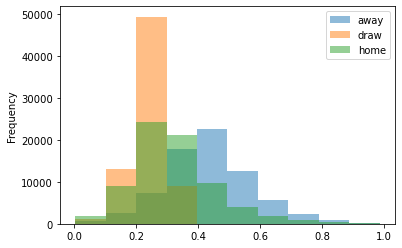

In [65]:
df_sub.iloc[:, 1:].plot.hist(alpha=0.5)

In [66]:
df_sub[['id', 'home', 'away', 'draw']].to_csv('submission.csv', index=False)
df_sub.head()

,id,away,draw,home
0,17761448,0.360621,0.291913,0.347467
1,17695487,0.360676,0.291388,0.347936
2,17715496,0.389293,0.298757,0.311950
3,17715493,0.241205,0.293148,0.465647
4,17715492,0.478397,0.285097,0.236507
